# データの読み込み

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [5]:
import datetime

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.read_excel('data_explanation.xlsx', sheet_name=0)

,ファイル名,内容
0,train.csv,訓練用データ
1,test.csv,評価用データ
2,weather.csv,天候データ
3,sample_submission.csv,投稿データフォーマット


In [8]:
pd.read_excel('data_explanation.xlsx', sheet_name=1)

,ファイル名,カラム名,内容
0,train.csv,kind,野菜の種類
1,NaN,date,日付
2,NaN,amount,卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
3,NaN,mode_price,卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
4,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
5,test.csv,kind,野菜の種類
6,NaN,date,日付
7,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
8,weather.csv,date,日付
9,NaN,mean_temp,平均気温（℃）


In [9]:
import openpyxl
data_exp = openpyxl.load_workbook('data_explanation.xlsx')
print(data_exp.sheetnames)

['データ説明', '\u3000カラム説明']


In [10]:
train_raw = pd.read_csv('train.csv')
train_raw

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [11]:
test_raw = pd.read_csv('test.csv')
test_raw

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [12]:
weather_raw = pd.read_csv('weather.csv')
weather_raw

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [13]:
sub_raw = pd.read_csv('sample_submission.csv')
sub_raw

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


## trainデータ

In [14]:
train = train_raw.copy()

### dateをdatetime型に変換

In [15]:
train['date'] = train['date'].astype(str)

In [16]:
train['date'] = pd.to_datetime(train['date'])

## testデータ

In [17]:
test = test_raw.copy()

### dateをdatetime型に変換

In [18]:
test['date'] = test['date'].astype(str)
test['date'] = pd.to_datetime(test['date'])

## weatherデータ

In [19]:
weather = weather_raw.copy()

### dateをdatetime型に変換

In [20]:
weather['date'] = weather['date'].astype(str)
weather['date'] = pd.to_datetime(weather['date'])

## submitデータ

### dateをdatetime型に変換

In [21]:
sub = sub_raw.copy()

In [22]:
sub['date'] = sub['date'].astype(str)
sub['date'] = pd.to_datetime(sub['date'])

# LSTM_submission

## 現状の課題

学習データの期間をどうするか問題

areaの「各地」「_」をreplaceで消して、ラベルエンコーディング

areaの値をもとにweatherのデータを紐づけ

In [23]:
train.kind.nunique(), test.kind.nunique()

(44, 16)

## 欠損値の数を確認

In [24]:
print('*** train ***\n', train.isnull().sum())
print('*** test ***\n', test.isnull().sum())
print('*** sample_submission ***\n', sub.isnull().sum())
print('*** weather ***\n', weather.isnull().sum())

*** train ***
 kind          0
date          0
amount        0
mode_price    0
area          0
dtype: int64
*** test ***
 kind    0
date    0
area    0
dtype: int64
*** sample_submission ***
 kind          0
date          0
mode_price    0
dtype: int64
*** weather ***
 date               0
mean_temp        367
max_temp         367
max_temp_time    367
min_temp         368
min_temp_time    368
sum_rain         369
sun_time         432
mean_humid       398
area               0
dtype: int64


## sample_submissionに含まれるすべての種類がtrainデータに含まれているか確認

In [25]:
sub_kind = sub.kind.unique()
test_kind = test.kind.unique()
train_kind = train.kind.unique()
print("submissionデータ種類：", len(sub_kind), "テストデータ種類：", len(test_kind), "訓練データ種類：", len(train_kind))

submissionデータ種類： 16 テストデータ種類： 16 訓練データ種類： 44


## trainにあってtestにないkind

In [26]:
set(train_kind) - set(test_kind)

{'いんげん',
 'うど',
 'うめ',
 'えだまめ',
 'えのきだけ',
 'かぶ',
 'かぼちゃ',
 'ごぼう',
 'さつまいも',
 'さといも',
 'さやえんどう',
 'しめじ',
 'しゅんぎく',
 'たけのこ',
 'たまねぎ',
 'とうもろこし',
 'なす',
 'なのはな',
 'にら',
 'ふき',
 'まつたけ',
 'みずな',
 'れんこん',
 'アスパラガス',
 'オクラ',
 'ピース',
 'ブロッコリー',
 'レイシにがうり'}

In [27]:
set(sub_kind) - set(test_kind)

set()

In [28]:
train_data = pd.DataFrame({"kind": test_kind})
print("訓練データ数：", len(train_data))
train_data.head()

訓練データ数： 16


,kind
0,だいこん
1,にんじん
2,キャベツ
3,レタス
4,はくさい


In [29]:
train["date"] = train["date"].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97782 entries, 0 to 97781
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kind        97782 non-null  object 
 1   date        97782 non-null  object 
 2   amount      97782 non-null  int64  
 3   mode_price  97782 non-null  float64
 4   area        97782 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ MB


In [30]:
# 辞書型に変換
train_data_dict = train.set_index(['kind', 'date'])['mode_price'].to_dict()
list(train_data_dict)[0:5]

[('だいこん', '2005-11-07'),
 ('だいこん', '2005-11-08'),
 ('だいこん', '2005-11-10'),
 ('だいこん', '2005-11-11'),
 ('だいこん', '2005-11-12')]

In [31]:
date_cols = pd.date_range(start='2017-04-30', end='2022-04-30').date.astype(str)

for col in date_cols:
    train_data[col] = train_data.kind.apply(lambda x: train_data_dict[(x, col)] 
                                                    if (x, col) in train_data_dict.keys()
                                                    else 0).astype(np.int32)
print('訓練データの行数と列数：', train_data.shape)
train_data

訓練データの行数と列数： (16, 1828)


,kind,2017-04-30,2017-05-01,2017-05-02,2017-05-03,2017-05-04,2017-05-05,2017-05-06,2017-05-07,2017-05-08,...,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
0,だいこん,0,1080,1134,0,0,0,1188,0,1080,...,1026,972,918,0,864,756,0,864,918,864
1,にんじん,0,1800,1404,0,0,0,1944,0,1674,...,1080,1296,1080,0,1080,1512,0,1404,1512,1512
2,キャベツ,0,1300,972,0,0,0,864,0,864,...,1080,972,972,0,972,972,0,756,756,1080
3,レタス,0,1782,1566,0,0,0,1512,0,1404,...,1188,1188,1296,0,1188,864,0,864,972,864
4,はくさい,0,1404,1296,0,0,0,1404,0,1296,...,1188,972,864,0,432,1134,0,1134,972,648
5,こまつな,0,108,113,0,0,0,119,0,119,...,140,124,97,0,119,130,0,86,81,81
6,ほうれんそう,0,102,97,0,0,0,113,0,81,...,97,102,97,0,97,86,0,86,81,108
7,ねぎ,0,1836,1836,0,0,0,1728,0,1836,...,1512,1620,1512,0,1620,1620,0,1620,1728,1728
8,きゅうり,0,1296,1296,0,0,0,1188,0,1080,...,1296,1404,1404,0,1404,1512,0,1404,1404,1404
9,トマト,0,972,972,0,0,0,972,0,972,...,1296,1296,1296,0,1296,1188,0,1188,1188,1080


In [32]:
train_data_T = train_data.T.replace(0, np.nan)
print(train_data_T.head(1))
train_data_T.isnull().sum()

        0     1     2    3     4     5       6   7     8    9     10     11  \
kind  だいこん  にんじん  キャベツ  レタス  はくさい  こまつな  ほうれんそう  ねぎ  きゅうり  トマト  ピーマン  じゃがいも   

          12    13    14     15  
kind  なましいたけ  セルリー  そらまめ  ミニトマト  


0      546
1      546
2      546
3      546
4      546
5      547
6      546
7      546
8      546
9      546
10     546
11     546
12     872
13    1196
14    1507
15     546
dtype: int64

## null値をdropnaで行削除

In [33]:
# だいこんの列のみdropna
train_data_T = train_data_T.dropna(axis=0, subset=[0])
train_data_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
kind,だいこん,にんじん,キャベツ,レタス,はくさい,こまつな,ほうれんそう,ねぎ,きゅうり,トマト,ピーマン,じゃがいも,なましいたけ,セルリー,そらまめ,ミニトマト
2017-05-01,1080,1800,1300,1782,1404,108,102,1836,1296,972,75,2916,173,3078,2808,118
2017-05-02,1134,1404,972,1566,1296,113,97,1836,1296,972,70,2052,173,3132,2052,124
2017-05-06,1188,1944,864,1512,1404,119,113,1728,1188,972,91,2160,173,3402,2160,119
2017-05-08,1080,1674,864,1404,1296,119,81,1836,1080,972,81,2187,173,3726,2376,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,864,1080,972,1188,432,119,97,1620,1404,1296,75,3456,97,2700,2376,108
2022-04-26,756,1512,972,864,1134,130,86,1620,1512,1188,81,3456,97,2592,3348,108
2022-04-28,864,1404,756,864,1134,86,86,1620,1404,1188,81,3348,97,2592,2052,108
2022-04-29,918,1512,756,972,972,81,81,1728,1404,1188,75,4104,102,2538,2592,108


## null値を野菜の各種類ごとの平均値で補完

In [34]:
for col in range(len(train_data_T.columns.values)):
    train_data_T[col] = train_data_T[col].fillna(round(train_data_T[col].iloc[1: 1828].mean()))

train_data = train_data_T.T

In [35]:
# 訓練データ確認
print('訓練データの行数と列数：', train_data.shape)
train_data

訓練データの行数と列数： (16, 1282)


,kind,2017-05-01,2017-05-02,2017-05-06,2017-05-08,2017-05-09,2017-05-11,2017-05-12,2017-05-13,2017-05-15,...,2022-04-18,2022-04-19,2022-04-21,2022-04-22,2022-04-23,2022-04-25,2022-04-26,2022-04-28,2022-04-29,2022-04-30
0,だいこん,1080,1134,1188,1080,1080,1026,972,1080,864,...,1080,1080,1026,972,918,864,756,864,918,864
1,にんじん,1800,1404,1944,1674,1566,1620,1512,1404,1512,...,1296,1512,1080,1296,1080,1080,1512,1404,1512,1512
2,キャベツ,1300,972,864,864,864,864,972,864,864,...,972,1080,1080,972,972,972,972,756,756,1080
3,レタス,1782,1566,1512,1404,1512,1404,1188,1296,1512,...,1188,1188,1188,1188,1296,1188,864,864,972,864
4,はくさい,1404,1296,1404,1296,1404,1188,1188,972,864,...,864,864,1188,972,864,432,1134,1134,972,648
5,こまつな,108,113,119,119,108,113,86,108,86,...,172,140,140,124,97,119,130,86,81,81
6,ほうれんそう,102,97,113,81,70,70,70,70,76,...,97,86,97,102,97,97,86,86,81,108
7,ねぎ,1836,1836,1728,1836,1890,2052,1728,1836,1620,...,1512,1620,1512,1620,1512,1620,1620,1620,1728,1728
8,きゅうり,1296,1296,1188,1080,1080,1080,1080,1080,972,...,1404,1404,1296,1404,1404,1404,1512,1404,1404,1404
9,トマト,972,972,972,972,972,972,1080,972,1080,...,1296,1296,1296,1296,1296,1296,1188,1188,1188,1080


In [36]:
len(pd.date_range("2022-05-02", "2022-05-31"))

30

In [37]:
def log_transform(data):
    data = data.applymap(lambda x: 0 if x==-1 else x)
    data.iloc[:, 1:1282] = np.log1p(data.iloc[:, 1:1282])
    return data

TRdata = log_transform(train_data)
TRdata.head(10)

,kind,2017-05-01,2017-05-02,2017-05-06,2017-05-08,2017-05-09,2017-05-11,2017-05-12,2017-05-13,2017-05-15,...,2022-04-18,2022-04-19,2022-04-21,2022-04-22,2022-04-23,2022-04-25,2022-04-26,2022-04-28,2022-04-29,2022-04-30
0,だいこん,6.985642,7.034388,7.080868,6.985642,6.985642,6.934397,6.880384,6.985642,6.762730,...,6.985642,6.985642,6.934397,6.880384,6.823286,6.762730,6.629363,6.762730,6.823286,6.762730
1,にんじん,7.496097,7.247793,7.573017,7.423568,7.356918,7.390799,7.321850,7.247793,7.321850,...,7.167809,7.321850,6.985642,7.167809,6.985642,6.985642,7.321850,7.247793,7.321850,7.321850
2,キャベツ,7.170888,6.880384,6.762730,6.762730,6.762730,6.762730,6.880384,6.762730,6.762730,...,6.880384,6.985642,6.985642,6.880384,6.880384,6.880384,6.880384,6.629363,6.629363,6.985642
3,レタス,7.486053,7.356918,7.321850,7.247793,7.321850,7.247793,7.080868,7.167809,7.321850,...,7.080868,7.080868,7.080868,7.080868,7.167809,7.080868,6.762730,6.762730,6.880384,6.762730
4,はくさい,7.247793,7.167809,7.247793,7.167809,7.247793,7.080868,7.080868,6.880384,6.762730,...,6.762730,6.762730,7.080868,6.880384,6.762730,6.070738,7.034388,7.034388,6.880384,6.475433
5,こまつな,4.691348,4.736198,4.787492,4.787492,4.691348,4.736198,4.465908,4.691348,4.465908,...,5.153292,4.948760,4.948760,4.828314,4.584967,4.787492,4.875197,4.465908,4.406719,4.406719
6,ほうれんそう,4.634729,4.584967,4.736198,4.406719,4.262680,4.262680,4.262680,4.262680,4.343805,...,4.584967,4.465908,4.584967,4.634729,4.584967,4.584967,4.465908,4.465908,4.406719,4.691348
7,ねぎ,7.515889,7.515889,7.455298,7.515889,7.544861,7.627057,7.455298,7.515889,7.390799,...,7.321850,7.390799,7.321850,7.390799,7.321850,7.390799,7.390799,7.390799,7.455298,7.455298
8,きゅうり,7.167809,7.167809,7.080868,6.985642,6.985642,6.985642,6.985642,6.985642,6.880384,...,7.247793,7.247793,7.167809,7.247793,7.247793,7.247793,7.321850,7.247793,7.247793,7.247793
9,トマト,6.880384,6.880384,6.880384,6.880384,6.880384,6.880384,6.985642,6.880384,6.985642,...,7.167809,7.167809,7.167809,7.167809,7.167809,7.167809,7.080868,7.080868,7.080868,6.985642


In [38]:
from sklearn.model_selection import train_test_split

def generate_walkforward_data(data, input_seq_len, output_seq_len, date_start_col, date_end_col, val_data=0.05):
    date_cols = np.r_[date_start_col: date_end_col]
    train_points = len(date_cols) - input_seq_len - output_seq_len
    input_seqs = []
    output_seqs = []
    for i in range(train_points+1):
        inp_start = i + date_start_col
        inp_end = inp_start + input_seq_len
        out_end = inp_end + output_seq_len 
        input_seqs.append( data.iloc[: , inp_start:inp_end].values.reshape(1, -1, input_seq_len).transpose(0, 2, 1) )
        output_seqs.append( data.iloc[: , inp_end:out_end].values.reshape(1, -1, output_seq_len).transpose(0, 2, 1) )
        
    input_seqs = np.concatenate(input_seqs)
    output_seqs = np.concatenate(output_seqs)
    
    train_x, val_x, train_y, val_y = train_test_split(input_seqs, output_seqs, test_size=val_data, random_state=1126)
    
    return train_x, val_x, train_y, val_y

In [39]:
input_seq_len = 30
output_seq_len = 30
train_x, val_x, train_y, val_y = generate_walkforward_data(TRdata, input_seq_len, output_seq_len, 1, 1282)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(1160, 30, 16) (1160, 30, 16) (62, 30, 16) (62, 30, 16)


##  モデル作成用ライブラリの読み込み

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [41]:
def buildManyToManyModel(train_data):
    model = Sequential()
    model.add(LSTM(10, input_shape = (train_data.shape[1], train_data.shape[2]),return_sequences=True))
    model.add(TimeDistributed(Dense(16)))
    model.compile(loss="mse", optimizer="adam")
    return model

In [42]:
model = buildManyToManyModel(train_x)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 10)            1080      
                                                                 
 time_distributed (TimeDistr  (None, 30, 16)           176       
 ibuted)                                                         
                                                                 
Total params: 1,256
Trainable params: 1,256
Non-trainable params: 0
_________________________________________________________________


In [43]:
callback = EarlyStopping(monitor="loss", patience=3, verbose=1, mode="auto")
history = model.fit(train_x, train_y, epochs=1000, batch_size=50, validation_data=(val_x, val_y), callbacks=[callback])

Epoch 1/1000
24/24 [==============================] - 3s 29ms/step - loss: 43.8906 - val_loss: 41.5567
Epoch 2/1000
24/24 [==============================] - 0s 10ms/step - loss: 39.1229 - val_loss: 36.5194
Epoch 3/1000
24/24 [==============================] - 0s 11ms/step - loss: 34.7541 - val_loss: 32.8952
Epoch 4/1000
24/24 [==============================] - 0s 11ms/step - loss: 31.0151 - val_loss: 29.1326
Epoch 5/1000
24/24 [==============================] - 0s 11ms/step - loss: 27.5435 - val_loss: 25.9752
Epoch 6/1000
24/24 [==============================] - 0s 11ms/step - loss: 24.7498 - val_loss: 23.5050
Epoch 7/1000
24/24 [==============================] - 0s 11ms/step - loss: 22.4228 - val_loss: 21.3227
Epoch 8/1000
24/24 [==============================] - 0s 11ms/step - loss: 20.3497 - val_loss: 19.3643
Epoch 9/1000
24/24 [==============================] - 0s 11ms/step - loss: 18.4810 - val_loss: 17.5913
Epoch 10/1000
24/24 [==============================] - 0s 11ms/step - los

In [44]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


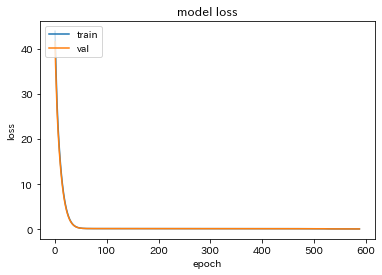

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [46]:
test_output = model.predict(train_x)
test_output.shape

37/37 [==============================] - 1s 4ms/step


(1160, 30, 16)

In [47]:
# 16*30に調整(~2022-04-30)
train_points = 1281 - 30 - 30
date_start_col = 1
inp_start = train_points + date_start_col
inp_end = inp_start + input_seq_len
out_end = inp_end + output_seq_len 
last_train_day = TRdata.iloc[: , inp_end:out_end]
last_train_day

,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-28,2022-03-29,2022-03-31,2022-04-01,2022-04-02,...,2022-04-18,2022-04-19,2022-04-21,2022-04-22,2022-04-23,2022-04-25,2022-04-26,2022-04-28,2022-04-29,2022-04-30
0,7.080868,6.985642,7.080868,6.985642,6.934397,6.823286,6.823286,6.629363,6.762730,6.762730,...,6.985642,6.985642,6.934397,6.880384,6.823286,6.762730,6.629363,6.762730,6.823286,6.762730
1,6.475433,7.285507,6.293419,6.293419,7.285507,6.475433,7.285507,7.167809,7.285507,7.285507,...,7.167809,7.321850,6.985642,7.167809,6.985642,6.985642,7.321850,7.247793,7.321850,7.321850
2,6.880384,6.880384,6.880384,6.880384,6.880384,6.985642,6.985642,6.985642,6.985642,7.080868,...,6.880384,6.985642,6.985642,6.880384,6.880384,6.880384,6.880384,6.629363,6.629363,6.985642
3,7.321850,7.167809,7.247793,7.167809,7.247793,7.321850,7.455298,7.455298,7.321850,7.356918,...,7.080868,7.080868,7.080868,7.080868,7.167809,7.080868,6.762730,6.762730,6.880384,6.762730
4,7.167809,7.390799,7.455298,7.544861,7.356918,7.515889,7.573017,7.390799,7.455298,7.486053,...,6.762730,6.762730,7.080868,6.880384,6.762730,6.070738,7.034388,7.034388,6.880384,6.475433
5,4.304065,4.343805,4.343805,4.406719,4.584967,4.465908,4.394449,4.343805,4.262680,4.143135,...,5.153292,4.948760,4.948760,4.828314,4.584967,4.787492,4.875197,4.465908,4.406719,4.406719
6,4.189655,4.189655,4.262680,4.406719,4.465908,4.634729,4.634729,4.406719,4.406719,4.406719,...,4.584967,4.465908,4.584967,4.634729,4.584967,4.584967,4.465908,4.465908,4.406719,4.691348
7,7.390799,7.390799,7.390799,7.390799,7.390799,7.390799,7.390799,7.390799,7.390799,7.455298,...,7.321850,7.390799,7.321850,7.390799,7.321850,7.390799,7.390799,7.390799,7.455298,7.455298
8,7.247793,7.247793,7.247793,7.247793,7.247793,7.247793,7.247793,7.247793,7.321850,7.247793,...,7.247793,7.247793,7.167809,7.247793,7.247793,7.247793,7.321850,7.247793,7.247793,7.247793
9,7.167809,7.247793,7.321850,7.247793,7.247793,7.167809,7.247793,7.247793,7.247793,7.167809,...,7.167809,7.167809,7.167809,7.167809,7.167809,7.167809,7.080868,7.080868,7.080868,6.985642


In [48]:
last_train_day = last_train_day.values.reshape(1, -1, output_seq_len).transpose(0, 2, 1)
last_train_day.shape

(1, 30, 16)

In [49]:
last_train_day

array([[[7.0808679 , 6.47543272, 6.88038408, 7.32184971, 7.16780918,
         4.30406509, 4.18965474, 7.39079852, 7.24779258, 7.16780918,
         4.63472899, 8.2377438 , 4.58496748, 8.14815644, 7.77988512,
         4.86753445],
        [6.98564182, 7.28550655, 6.88038408, 7.16780918, 7.39079852,
         4.34380542, 4.18965474, 7.39079852, 7.24779258, 7.24779258,
         4.46590812, 8.2377438 , 4.63472899, 8.11641707, 7.77988512,
         4.86753445],
        [7.0808679 , 6.29341928, 6.88038408, 7.24779258, 7.45529849,
         4.34380542, 4.26267988, 7.39079852, 7.24779258, 7.32184971,
         4.46590812, 8.2377438 , 4.63472899, 8.0836372 , 7.77988512,
         4.91265489],
        [6.98564182, 6.29341928, 6.88038408, 7.16780918, 7.54486107,
         4.40671925, 4.40671925, 7.39079852, 7.24779258, 7.24779258,
         4.63472899, 8.2377438 , 4.63472899, 7.97831097, 7.77988512,
         4.86753445],
        [6.93439721, 7.28550655, 6.88038408, 7.24779258, 7.35691824,
         4.5849

In [50]:
test_output = model.predict(last_train_day)
test_output.shape

1/1 [==============================] - 0s 24ms/step


(1, 30, 16)

In [51]:
test_output

array([[[6.891003 , 7.246789 , 6.7222805, 7.327351 , 6.616132 ,
         4.875815 , 4.627903 , 7.411134 , 7.2913094, 7.1866584,
         4.284326 , 7.736285 , 4.684948 , 7.7107162, 7.7139387,
         4.970739 ],
        [6.8349967, 7.1559873, 6.765246 , 7.2811327, 6.8307915,
         4.8366423, 4.676575 , 7.4351606, 7.3824034, 7.215825 ,
         4.3869886, 7.754942 , 4.655836 , 7.7363534, 7.7271013,
         4.904483 ],
        [6.851821 , 7.166351 , 6.7908163, 7.298891 , 6.875455 ,
         4.8491592, 4.702226 , 7.46222  , 7.4184   , 7.2424664,
         4.4139175, 7.7878485, 4.6703997, 7.7568593, 7.7539415,
         4.909463 ],
        [6.8644066, 7.1776237, 6.802047 , 7.31141  , 6.8864374,
         4.8583617, 4.7130814, 7.4754143, 7.4322834, 7.2551184,
         4.422156 , 7.8044996, 4.6800528, 7.766467 , 7.767661 ,
         4.916283 ],
        [6.8626204, 7.1738524, 6.7985926, 7.3076744, 6.8814144,
         4.8573303, 4.7137694, 7.4725895, 7.4299498, 7.2523723,
         4.4213834, 

In [52]:
syurui = np.exp(test_output[0]) - 1
syurui[:,6]

array([101.29931 , 106.40161 , 109.19221 , 110.39488 , 110.47156 ,
       111.68454 , 110.70802 , 110.77132 , 110.15907 , 110.43828 ,
       110.88869 , 110.90603 , 110.845695, 111.0503  , 110.82073 ,
       112.14008 , 111.79103 , 111.70012 , 110.3926  , 109.8462  ,
       110.9118  , 110.13872 , 111.10813 , 110.83177 , 110.762634,
       111.29714 , 110.59435 , 109.620476, 109.13993 , 111.1123  ],
      dtype=float32)

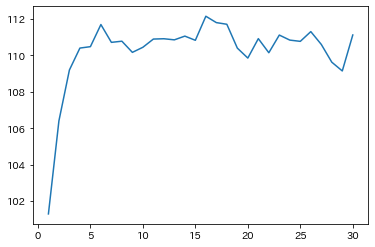

In [53]:
price = syurui[:,6]
day = np.arange(1,31)
plt.plot(day,price)

In [54]:
price_ = np.exp(test_output[0]) - 1
price_.shape

(30, 16)

In [55]:
result = price_.T.ravel()
result.shape

(480,)

In [56]:
datetime = pd.date_range('2022-05-02',periods=30)
string_list = []
for i in range(len(TRdata['kind'])): #16
    for j in range(len(datetime)): #30
        string_list.append(TRdata['kind'][i]+'_'+datetime[j].strftime('%Y-%m-%d'))
        
df = pd.DataFrame(result, index = string_list,columns=['mode_price'])
df.index.name = 'kind_'
df = df.reset_index()
df['kind'] = df.kind_.apply(lambda x: '_'.join(x.split('_')[:-1]))
df['date'] = df.kind_.apply(lambda x: x.split('_')[-1])

## for文で予測値をプロット

だいこん


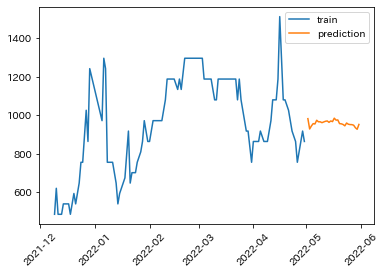

にんじん


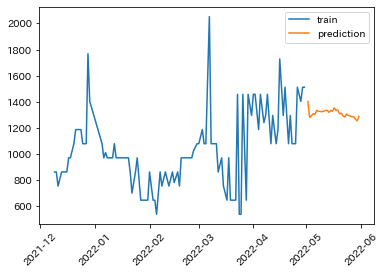

キャベツ


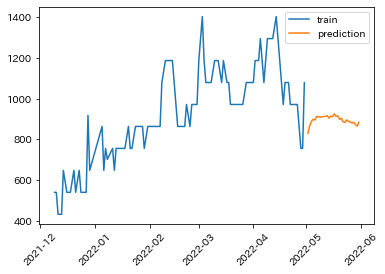

レタス


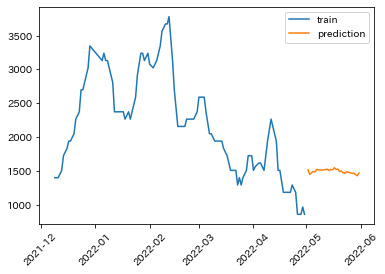

はくさい


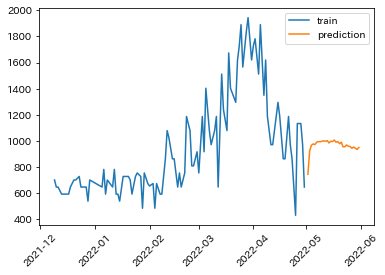

こまつな


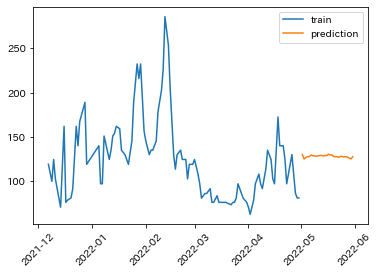

ほうれんそう


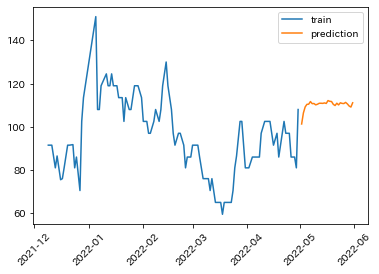

ねぎ


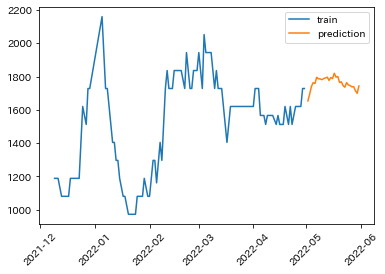

きゅうり


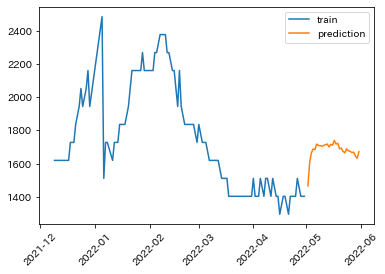

トマト


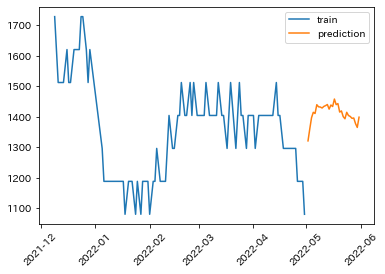

ピーマン


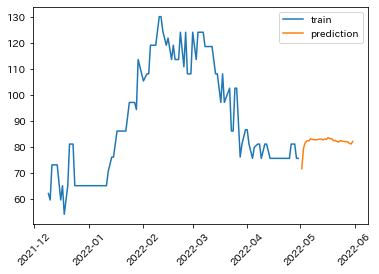

じゃがいも


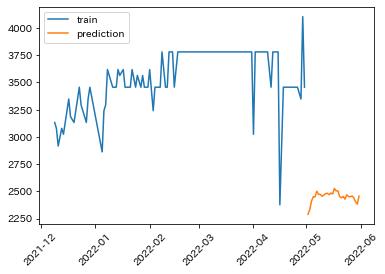

なましいたけ


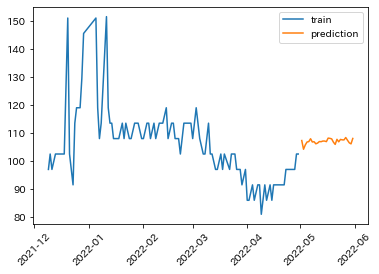

セルリー


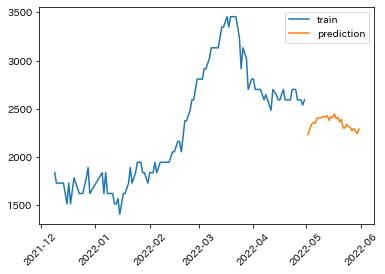

そらまめ


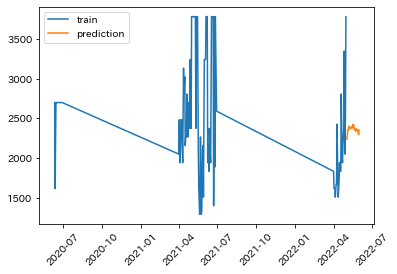

ミニトマト


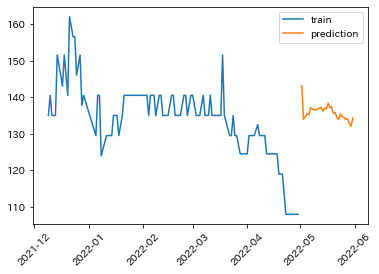

In [57]:
for kind_name in test["kind"].unique():
    print(kind_name)
    forecast_kind = df[df["kind"]==kind_name]
    forecast_kind['date'] = forecast_kind['date'].astype(str)
    forecast_kind["date"] = pd.to_datetime(forecast_kind['date'])
    
    df_kind = train[train["kind"]==kind_name]
    df_kind['date'] = df_kind['date'].astype(str)
    df_kind['date'] = pd.to_datetime(df_kind['date'])
    
    plt.figure()
    plt.plot(df_kind.set_index("date").tail(100)[["mode_price"]])
    plt.plot(forecast_kind.set_index("date")[["mode_price"]])
    plt.xticks(rotation=45)
    plt.legend(["train","prediction"])
    plt.show()

In [58]:
df['date'] = df.date.apply(lambda x: x.replace('-', ''))

df_pred = df[['kind','date','mode_price']]
df_pred

,kind,date,mode_price
0,だいこん,20220502,982.387451
1,だいこん,20220503,928.825317
2,だいこん,20220504,944.601257
3,だいこん,20220505,956.577454
4,だいこん,20220506,954.868530
...,...,...,...
475,ミニトマト,20220527,133.992416
476,ミニトマト,20220528,134.121796
477,ミニトマト,20220529,132.895599
478,ミニトマト,20220530,132.033081


In [59]:
sub_raw['date'] = sub_raw['date'].astype(str)
sub_raw

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


In [60]:
df_result = pd.merge(sub_raw.drop("mode_price", axis=1), df_pred, how="left", on=["kind", "date"])
df_result

,kind,date,mode_price
0,だいこん,20220502,982.387451
1,だいこん,20220506,954.868530
2,だいこん,20220507,974.041199
3,だいこん,20220509,966.076050
4,だいこん,20220510,961.615173
...,...,...,...
315,ミニトマト,20220526,134.469650
316,ミニトマト,20220527,133.992416
317,ミニトマト,20220528,134.121796
318,ミニトマト,20220530,132.033081


## CSVファイル出力

In [61]:
df_result.to_csv("result_LSTM.csv", index=False, encoding="utf_8_sig")